In [6]:
from pyspark.sql import SparkSession
from matplotlib import pyplot as plt

In [7]:
spark = SparkSession.builder.appName('5003_project_EDA').getOrCreate()
sc = spark.sparkContext

In [8]:
data = spark.read.csv('./car_prices_without_null.csv', header=True, inferSchema=True)
data.createOrReplaceTempView("car_prices")
data.show(10)

+----+---------+-------------------+--------------------+-----------+------------+-----------------+-----+---------+--------+-----+--------+--------------------+-------+------------+--------------------+
|year|     make|              model|                trim|       body|transmission|              vin|state|condition|odometer|color|interior|              seller|    mmr|sellingprice|            saledate|
+----+---------+-------------------+--------------------+-----------+------------+-----------------+-----+---------+--------+-----+--------+--------------------+-------+------------+--------------------+
|2015|      Kia|            Sorento|                  LX|        SUV|   automatic|5xyktca69fg566472|   ca|      5.0| 16639.0|white|   black|kia motors americ...|20500.0|     21500.0|Tue Dec 16 2014 1...|
|2015|      Kia|            Sorento|                  LX|        SUV|   automatic|5xyktca69fg561319|   ca|      5.0|  9393.0|white|   beige|kia motors americ...|20800.0|     21500.0|Tu

### EDA

##### Year

In [9]:
year_stat = data.select('*').groupBy('year').count().sort('year', ascending=False)

year_stat.show(n=10)

+----+-----+
|year|count|
+----+-----+
|2015| 7994|
|2014|69712|
|2013|87467|
|2012|87380|
|2011|41384|
|2010|22616|
|2009|17959|
|2008|27011|
|2007|25378|
|2006|21631|
+----+-----+
only showing top 10 rows



Text(0.5, 1.0, 'Number of Trading Vehicles By Year')

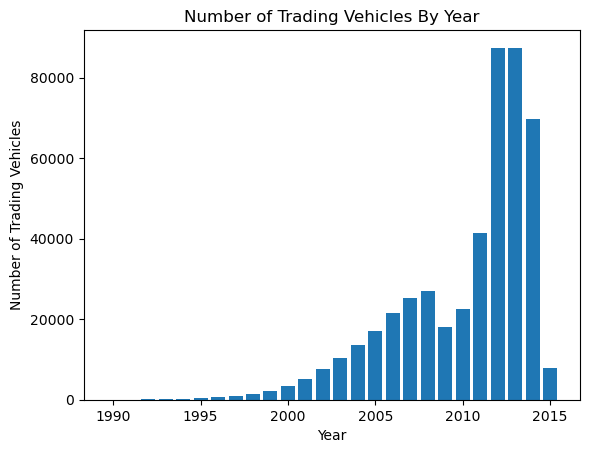

In [10]:
year_pds = year_stat.toPandas()

plt.bar(year_pds['year'], year_pds['count'])
plt.xlabel('Year')
plt.ylabel('Number of Trading Vehicles')
plt.title('Number of Trading Vehicles By Year')

##### Make

In [ ]:
make_stat = data.select('*').groupBy('make').count().sort('count', ascending=False)

make_stat.show(n=10)

In [ ]:
make_pds = make_stat.toPandas()[:20]

plt.figure(figsize=(10, 5))
plt.bar(make_pds['make'], make_pds['count'])
plt.xticks(rotation=30, ha='right')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Trading Vehicles')
plt.title('Number of Trading Vehicles By Top 20 Best Selling Manufacturer')

##### Body

In [11]:
body_stat = data.select('*').groupBy('body').count().sort('count', ascending=False)
body_stat.show(10)

+-----------+------+
|       body| count|
+-----------+------+
|      Sedan|174647|
|        SUV|100347|
|      sedan| 36651|
|        suv| 20621|
|  Hatchback| 19351|
|    Minivan| 18305|
|      Coupe| 13121|
|      Wagon| 12023|
|   Crew Cab| 11508|
|Convertible|  7725|
+-----------+------+
only showing top 10 rows



Text(0.5, 1.0, 'Number of Trading Vehicles By Top 20 Best Selling Body')

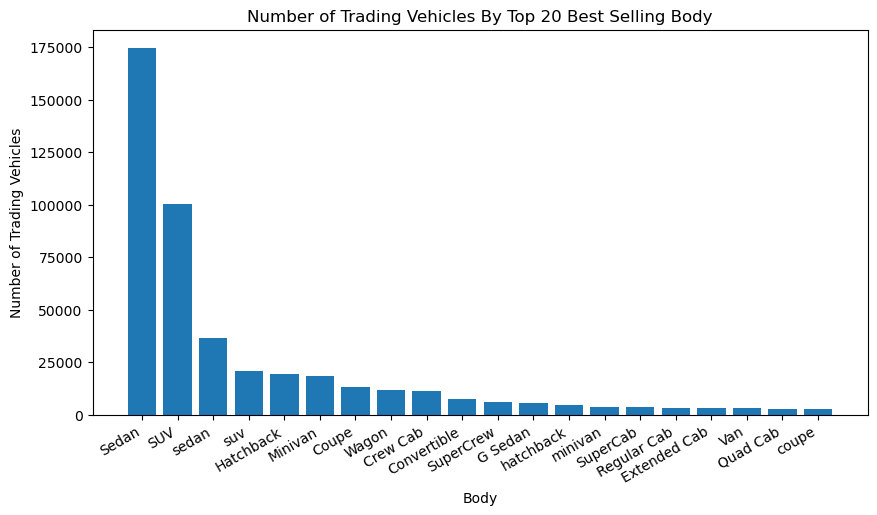

In [12]:
body_pds = body_stat.toPandas()[:20]

plt.figure(figsize=(10, 5))
plt.bar(body_pds['body'], body_pds['count'])
plt.xticks(rotation=30, ha='right')
plt.xlabel('Body')
plt.ylabel('Number of Trading Vehicles')
plt.title('Number of Trading Vehicles By Top 20 Best Selling Body')

##### SQLs

In [13]:
spark.sql('''
SELECT make, model, count(*) as total
FROM car_prices
GROUP BY make, model
ORDER BY make ASC, model DESC
''').show(n=10)

+-----+---------------+-----+
| make|          model|total|
+-----+---------------+-----+
|Acura|            mdx|    1|
|Acura|            ZDX|   28|
|Acura|TSX Sport Wagon|   28|
|Acura|            TSX|  789|
|Acura|            TLX|    1|
|Acura|             TL| 1649|
|Acura|            RSX|  130|
|Acura|            RLX|   13|
|Acura|             RL|   91|
|Acura|            RDX|  300|
+-----+---------------+-----+
only showing top 10 rows



In [14]:
# 最好卖的车型top

spark.sql('''
SELECT make, model, count(*) as total
FROM car_prices
GROUP BY make, model
ORDER BY total DESC
''').show(n=10)

+---------+--------+-----+
|     make|   model|total|
+---------+--------+-----+
|   Nissan|  Altima|16346|
|     Ford|  Fusion|12116|
|     Ford|   F-150|11950|
|   Toyota|   Camry|10986|
|     Ford|  Escape|10656|
|     Ford|   Focus| 9547|
|    Honda|  Accord| 8528|
|Chevrolet|  Impala| 7500|
|      BMW|3 Series| 7132|
|    Honda|   Civic| 7068|
+---------+--------+-----+
only showing top 10 rows

